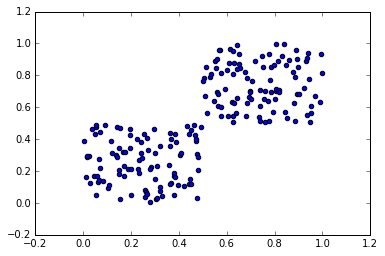

[60.968073849997282, 43.497384629253268, 36.337612014376873, 59.196929506372555]
[60.88484421070185, 42.96555802080411, 39.043916629596232, 57.105681138897793]
[63.987644677286994, 34.835231785156516, 36.066140163359165, 65.110983374197332]
[69.482887714345438, 19.570329819749244, 30.552107603792258, 80.394674862113064]
[77.66720838910183, 5.9754878588353124, 22.415456828600224, 93.94184692346262]
[88.687295702815561, 0.006954568477618165, 11.625191602974567, 99.680558125732219]
[99.499398244380558, 2.4467633158101972e-37, 1.0331095889834985, 99.467492166635836]


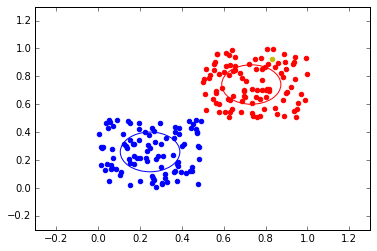

0.141360622756 0.0 0.00477753996787 0.142411752757
0.0197599392275 nan 0.00200194103472 0.0204760110039


In [7]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

data1=[]
for i in range(100):
	data1=data1+[[0.5+0.5*random.random(),0.5+0.5*random.random()]]
	
data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

#data3 =[]
#for i in range(30):
#	data3=data3+[[0.8,random.random()]]

data=data1+data2#+data3



datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]

plt.scatter(datax,datay)
plt.show()


	
assign = []
for j in range(4):
	assign=assign+[[random.random(),random.random()]]




sum=[]
for i in range(len(data)):
	sum=sum+[[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assign=[]
for k in range(4):
	update_assign=update_assign+[[]]	

I = 2 # dimension

v=[] # variance or 1/beta	
for k in range(4):
	v=v+[np.var(data)]

p=[]
for k in range(4):
	p=p+[1]
rsum=[[],[],[],[]]
turn = 0
while turn<7:
	turn = turn+1
	sum=[]
	for n in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+p[k]/(np.sqrt(2*np.pi*v[k]))**I*np.exp(-1/v[k]*(LA.norm(np.array(assign[k])-np.array(data[n]))))
			sum[n]=s
		for k in range(4):
			r[k][n]=p[k]/(np.sqrt(2*np.pi*v[k]))**I*np.exp(-1/v[k]*(LA.norm(np.array(assign[k])-np.array(data[n]))))/s
			#print a,j,n,r[j][n]

	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
			rsum[k]=rs
			

		ua=[0,0]
		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*data[n][0]/float(rsum[k])
			ua[1]=ua[1]+r[k][n]*data[n][1]/float(rsum[k])
			update_assign[k]=ua
			
	assign= update_assign
	v=[0,0,0,0]
	for k in range(4):
		for n in range(len(data)):
			v[k]=v[k]+r[k][n]*LA.norm(np.array(data[n])-np.array(assign[k]))**2/float(I*rsum[k])
	print rsum
	rsumsum=0
	for k in range(4):
		rsumsum=rsumsum+rsum[k]
	
	p[k]=rsum[k]/float(rsumsum)	


c=[[],[],[],[]]
for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]
""

circle0= plt.Circle(assign[0],np.sqrt(v[0]),color='r',fill=False)
circle1= plt.Circle(assign[1],np.sqrt(v[1]),color='g',fill=False)
circle2= plt.Circle(assign[2],np.sqrt(v[2]),color='y',fill=False)
circle3= plt.Circle(assign[3],np.sqrt(v[3]),color='b',fill=False)

fig, ax=plt.subplots()
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
ax.add_artist(circle0)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

ax.scatter([x for x,y in c[0]],[y for x,y in c[0]],color='r')
ax.scatter([x for x,y in c[1]],[y for x,y in c[1]],color='g')
ax.scatter([x for x,y in c[2]],[y for x,y in c[2]],color='y')
ax.scatter([x for x,y in c[3]],[y for x,y in c[3]],color='b')


plt.show()

print np.sqrt(v[0]),np.sqrt(v[1]),np.sqrt(v[2]),np.sqrt(v[3])
print np.var(c[0]),np.var(c[1]),np.var(c[2]),np.var(c[3])

	